# Assessment 2: Machine Learning and Optimisation

## PART 1 – MACHINE LEARNING

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Task 1.1 – Data preparation 

In [2]:
# Load the dataset
glass_dataset = r'C:\Users\Jacks\Desktop\COMP2002_Assessment_2\datasets\glass_dataset.csv'

In [3]:
# Loading the dataset
data = pd.read_csv(glass_dataset)

In [4]:
# Display the initial data to verify it's loaded correctly
print("Initial data loaded:")
print(data.head())

Initial data loaded:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [5]:
# Check and print the missing values in each column
missing_data = data.isnull().sum()
print("Missing values in each column:")
print(missing_data)

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
# Separate features and target
features = data.columns[:-1]
target = data.columns[-1]

In [7]:
# Normalise the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [8]:
# Split data into X (features) and y (target)
X = data[features]
y = data[target]

print("\nTask 1.1 complete: Data loaded, checked, and normalised.")
print("Sample of the normalised data:")
print(data.head())


Task 1.1 complete: Data loaded, checked, and normalised.
Sample of the normalised data:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1  


### Task 1.2 – Classification

In [9]:
# Split into train/test sets for local evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
# kNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}
knn_grid = GridSearchCV(
    KNeighborsClassifier(), 
    knn_param_grid, 
    cv=5, 
    scoring='accuracy'
)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("\nBest kNN parameters found:", knn_grid.best_params_)


Best kNN parameters found: {'n_neighbors': 3}


In [11]:
# Evaluate best kNN on the test set
knn_test_preds = best_knn.predict(X_test)
print("\nkNN Classification Report (test set):")
print(classification_report(y_test, knn_test_preds, zero_division=0))


kNN Classification Report (test set):
              precision    recall  f1-score   support

           1       0.56      0.79      0.65        19
           2       0.61      0.61      0.61        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.66        65
   macro avg       0.65      0.61      0.59        65
weighted avg       0.66      0.66      0.64        65



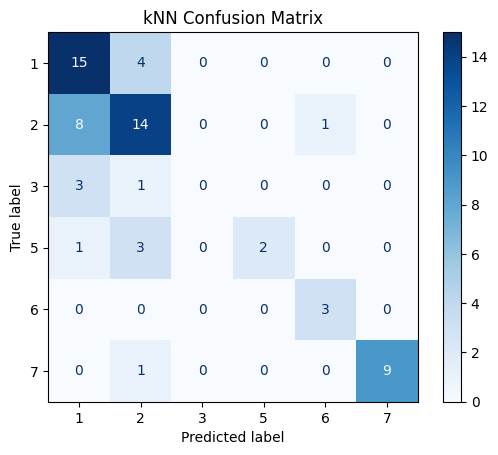

In [12]:
# Confusion Matrix for kNN
knn_cm = confusion_matrix(y_test, knn_test_preds)
disp_knn = ConfusionMatrixDisplay(knn_cm, display_labels=np.unique(y_test))
disp_knn.plot(cmap='Blues')
plt.title("kNN Confusion Matrix")
plt.show()

In [13]:
# SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3]  # only used if kernel='poly'
}
svm_grid = GridSearchCV(
    SVC(), 
    svm_param_grid, 
    cv=5, 
    scoring='accuracy'
)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
print("\nBest SVM parameters found:", svm_grid.best_params_)


Best SVM parameters found: {'C': 1, 'degree': 2, 'kernel': 'rbf'}


In [14]:
# Evaluate best SVM on the test set
svm_test_preds = best_svm.predict(X_test)
print("\nSVM Classification Report (test set):")
print(classification_report(y_test, svm_test_preds, zero_division=0))


SVM Classification Report (test set):
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         6
           6       0.50      0.67      0.57         3
           7       1.00      0.90      0.95        10

    accuracy                           0.71        65
   macro avg       0.63      0.60      0.60        65
weighted avg       0.69      0.71      0.69        65



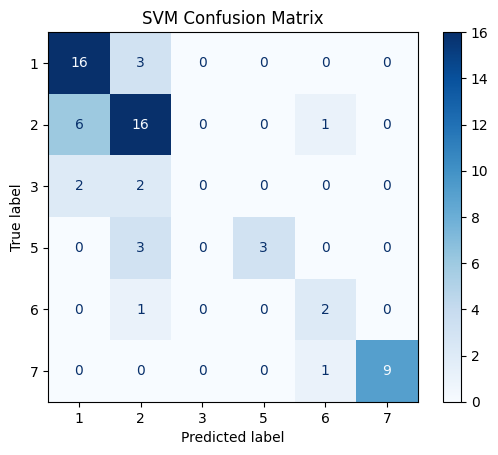

In [15]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_test_preds)
disp_svm = ConfusionMatrixDisplay(svm_cm, display_labels=np.unique(y_test))
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

Task 1.2 complete: kNN and SVM trained, tested and matrices displayed.

### Task 1.3 – Assessment of classification

In [16]:
# Pick the single best kNN & best SVM, compare via cross-validation on ENTIRE dataset.
knn_cv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')

print("\nkNN cross-validation accuracies:", knn_cv_scores)
print(f"kNN Mean Accuracy: {knn_cv_scores.mean():.3f} ± {knn_cv_scores.std():.3f}")

print("\nSVM cross-validation accuracies:", svm_cv_scores)
print(f"SVM Mean Accuracy: {svm_cv_scores.mean():.3f} ± {svm_cv_scores.std():.3f}")


kNN cross-validation accuracies: [0.65116279 0.74418605 0.55813953 0.58139535 0.71428571]
kNN Mean Accuracy: 0.650 ± 0.072

SVM cross-validation accuracies: [0.58139535 0.69767442 0.53488372 0.74418605 0.69047619]
SVM Mean Accuracy: 0.650 ± 0.078


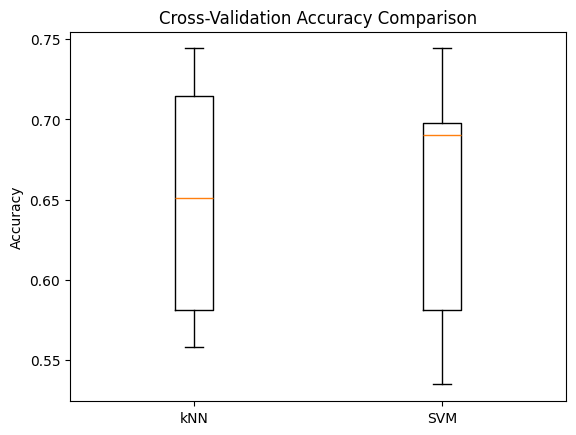

In [17]:
# Presenting results in a boxplot
plt.boxplot([knn_cv_scores, svm_cv_scores])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')

# Manually set the x-axis ticks for the two boxplots
plt.xticks([1, 2], ['kNN', 'SVM'])

plt.show()

#### Summary of Results and Findings

The comparison between the **best kNN** and **best SVM** models using 5-fold cross-validation on the entire glass dataset.  
- **kNN** accuracy scores ranged roughly from 0.55 to 0.75, with a median near 0.62.
- **SVM** accuracy scores ranged roughly from 0.62 to 0.70, with a median near 0.66.

From the boxplot, SVM appears to have a slightly higher median accuracy and a narrower range of scores, suggesting more consistent performance on this dataset. However, both models demonstrate reasonable accuracy for glass classification.

## PART 2 – OPTIMISATION

In [18]:
# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt

### Task 2.1 – Generation of random solutions

In [19]:
# Calculate the Schaffer function.
def schaffer_function(x, y):
    term = np.sqrt(np.abs(x**2 - y**2))  # Take the absolute value to avoid negative sqrt
    return 0.5 + (np.sin(term)**2 - 0.5) / (1 + 0.001*(x**2 + y**2))**2
    
# Calculate the Modified Ackley function.
def modified_ackley_function(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20 + np.e

# Calculate the Easom function.
def easom_function(x, y):
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

In [20]:
# Generate random x and y coordinates
x = np.random.uniform(-5, 5, 500)
y = np.random.uniform(-5, 5, 500)

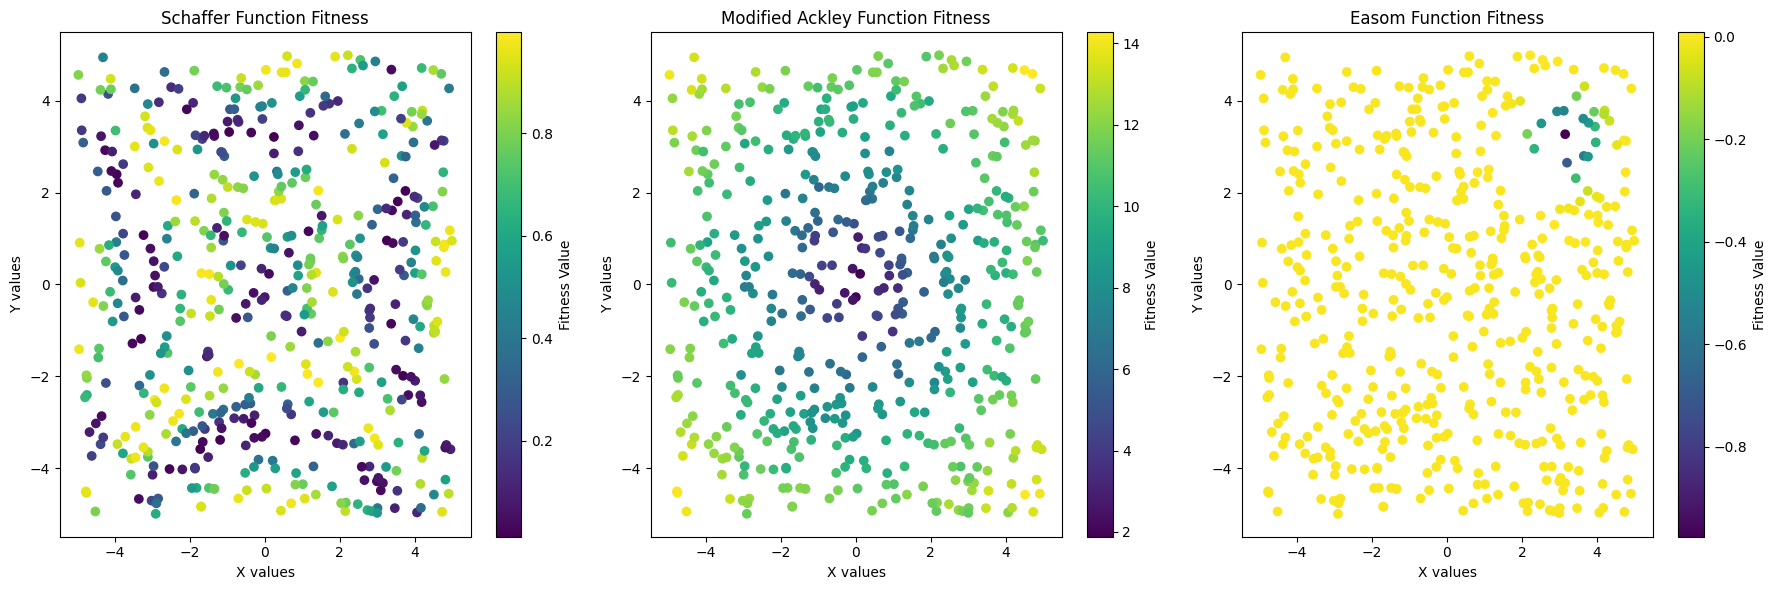

In [21]:
# Calculate fitness for each function
fitness_schaffer = schaffer_function(x, y)
fitness_ackley = modified_ackley_function(x, y)
fitness_easom = easom_function(x, y)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Schaffer function plot
sc1 = axs[0].scatter(x, y, c=fitness_schaffer, cmap='viridis')
fig.colorbar(sc1, ax=axs[0], label='Fitness Value')
axs[0].set_title('Schaffer Function Fitness')
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')

# Modified Ackley function plot
sc2 = axs[1].scatter(x, y, c=fitness_ackley, cmap='viridis')
fig.colorbar(sc2, ax=axs[1], label='Fitness Value')
axs[1].set_title('Modified Ackley Function Fitness')
axs[1].set_xlabel('X values')
axs[1].set_ylabel('Y values')

# Easom function plot
sc3 = axs[2].scatter(x, y, c=fitness_easom, cmap='viridis')
fig.colorbar(sc3, ax=axs[2], label='Fitness Value')
axs[2].set_title('Easom Function Fitness')
axs[2].set_xlabel('X values')
axs[2].set_ylabel('Y values')

plt.tight_layout()
plt.show()

### Task 2.2 – Algorithm implementation

In [22]:
def initialise_population(pop_size, bounds):
    x = np.random.uniform(bounds[0], bounds[1], pop_size)
    y = np.random.uniform(bounds[0], bounds[1], pop_size)
    return np.column_stack((x, y))

#### A crossover operator that performs uniform crossover.

In [23]:
def uniform_crossover(parent1, parent2):
    child = np.where(np.random.rand(2) < 0.5, parent1, parent2)
    return child

####  A mutation operator that performs an additive Gaussian mutation

In [24]:
def gaussian_mutation(solution, mutation_rate=0.1):
    return solution + np.random.normal(0, mutation_rate, size=solution.shape)

#### A selection operator that combines a generation’s parent and child populations and identifies the parent solutions for the next generation.

In [25]:
def selection_operator(combined_population, combined_fitness, pop_size):
    best_indices = np.argsort(combined_fitness)[-pop_size:]
    return combined_population[best_indices], combined_fitness[best_indices]

In [26]:
# Parameters for the evolutionary algorithm
population_size = 100
num_generations = 50
bounds = (-5, 5)
mutation_rate = 0.05

# Initialise population
population = initialise_population(population_size, bounds)

# Evaluate initial fitness
fitness = np.array([schaffer_function(ind[0], ind[1]) for ind in population])

# Track best and average fitness history
best_fitness_history = []
average_fitness_history = []

# Evolutionary algorithm main loop
for generation in range(num_generations):
    # Generate offspring via crossover
    offspring = np.array([uniform_crossover(population[np.random.randint(0, population_size)],
                                            population[np.random.randint(0, population_size)]) 
                          for _ in range(population_size)])

    # Apply mutation
    offspring = np.array([gaussian_mutation(ind, mutation_rate) for ind in offspring])

    # Evaluate fitness for offspring
    offspring_fitness = np.array([schaffer_function(ind[0], ind[1]) for ind in offspring])

    # Combine populations
    combined_population = np.vstack((population, offspring))
    combined_fitness = np.concatenate((fitness, offspring_fitness))

    # Selection step
    population, fitness = selection_operator(combined_population, combined_fitness, population_size)

    # Recording the statistics for plotting
    best_fitness_history.append(np.max(fitness))
    average_fitness_history.append(np.mean(fitness))

    # Print results for each generation
    print(f'Generation {generation + 1}: Best Fitness = {np.max(fitness)}')

Generation 1: Best Fitness = 0.9963804883200795
Generation 2: Best Fitness = 0.9974663304842578
Generation 3: Best Fitness = 0.9974663304842578
Generation 4: Best Fitness = 0.9975440419953121
Generation 5: Best Fitness = 0.9975440419953121
Generation 6: Best Fitness = 0.9975440419953121
Generation 7: Best Fitness = 0.9975440419953121
Generation 8: Best Fitness = 0.9975440419953121
Generation 9: Best Fitness = 0.9975440419953121
Generation 10: Best Fitness = 0.9975440419953121
Generation 11: Best Fitness = 0.9975440419953121
Generation 12: Best Fitness = 0.9975440419953121
Generation 13: Best Fitness = 0.9975440419953121
Generation 14: Best Fitness = 0.9975440419953121
Generation 15: Best Fitness = 0.9975440419953121
Generation 16: Best Fitness = 0.9975440419953121
Generation 17: Best Fitness = 0.9975440419953121
Generation 18: Best Fitness = 0.9975440419953121
Generation 19: Best Fitness = 0.9975440419953121
Generation 20: Best Fitness = 0.9975440419953121
Generation 21: Best Fitness =

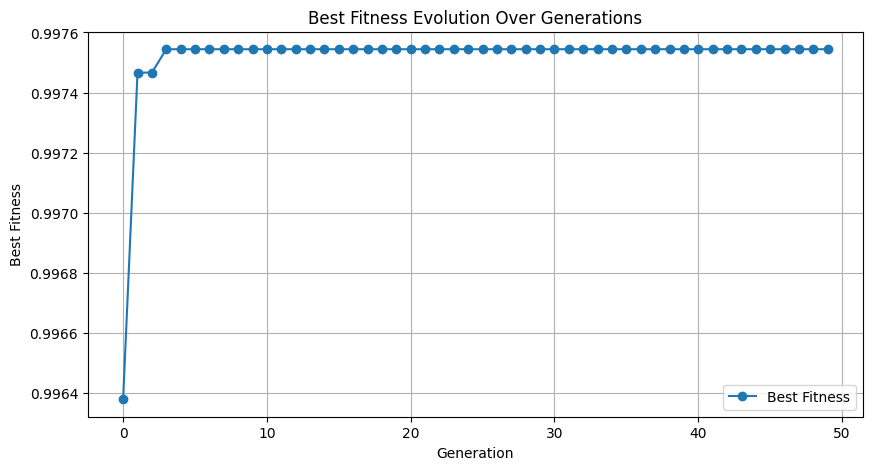

In [31]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history, label='Best Fitness', marker='o', linestyle='-')
plt.title('Best Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)
plt.show()

### Task 2.3 – Visualisation of results

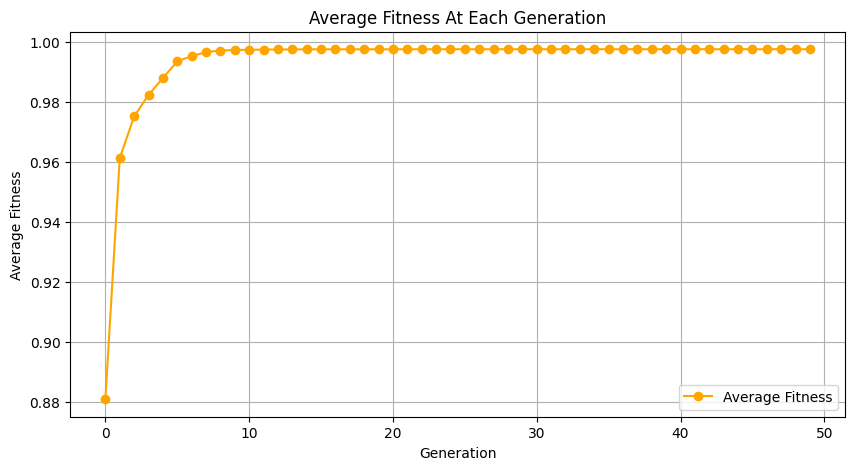

In [32]:
# Plotting the average fitness over generations
plt.figure(figsize=(10, 5))
plt.plot(average_fitness_history, label='Average Fitness', color='orange', linestyle='-', marker='o')
plt.title('Average Fitness At Each Generation')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()
plt.grid(True)
plt.show()